##Customer Segmentation on E-Commerce Dataset

This is a report on Customer Segmentation on E-Commerce.


**Table of Contents:**

* [Introduction](#scrollTo=OJR5v_h4tNnb&line=1&uniqifier=1)
* [Importing Libraries](#scrollTo=qnEN2R-KybPt&line=1&uniqifier=1)
* [Data Collection](#scrollTo=2Z0GzbuzygFV)
* [Data Processing and Cleaning](#scrollTo=fCzyLEtbykM2)
* [Explanatory Data Analysis](#scrollTo=4LtpbfdqzG3o)
* [Modeling](#scrollTo=lO0l8wYvzakg)
* [Findings](#scrollTo=YS4OtdCqTbpQ)
* [Conclusion](#scrollTo=M60005xeTWri&line=1&uniqifier=1)
* [Refrences](#scrollTo=ULdpqMm9Z0vK)

##Introduction

In this project, we dive into the data science world by performing customer segmentation on the data of an E-commerce company. Through this customer segmentation, we will identify different categories of customers based on their characteristics and behaviors. We will be following the data science process from collecting the data, cleaning the data, processing the data to analysing the data and modelling it.

<br>

**What is Customer Segmentation?**


Customer segmentation is the practice of dividing a company's customers into groups that reflect similarities among customers in each group. The goal of segmenting customer is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business.

<br>

**Type of segmentation factors**
* Demographic segmentation: It is one of the most popular and commonly used type of market segmentation. It refers to statistical data about a group of people. It includes age, gender, income, location, education, and ethnicity.

* Psychographic segmentation: This type of market segmentation categorizes customers by factors that relates to their personality and characterisitcs. It includes interests, lifestyles, pyschological influences, motivation, and priorities.

* Behavioural segmentation: while demographic and pyschographic segmentation focuses on who the customer is, behavioural segmentation focus on how the customer acts. It includes purchasing habits, spending habits, user status and brand interactions.

* Geographic segmentation: This type of market segmentation is the most simplest one, it categorizes customers based on geographic borders. It includes zip code, city, country, and climate.

<br>

**Advantages of customer segmentation**

There are many advantages to a firm that segments its customers such as Price optimization, Enhancing competitiveness, Brand awareness, Acquisition and Retention, Increasing revenue and Return On investment.

<br>

**Motivation**

The motivation behind this project is learning and exploribg the value of customer information in E-commerce and how data science can help busineses with marketing strategies.

<br>

E-commerce refers to the buying and selling of goods and services over the internet/ online. These businesses usually make money from: online sales revenue, marketing partnerships and advertisements.
Therefore, E-commerce businesses depend heavily on the size and engagement of their user base. More users directly correlate with increased online sales revenue, higher potential for successful marketing partnerships, and greater revenue generation from advertisements, emphasizing the critical importance of a growing and active user community for sustained financial success.

<br>

One way of increasing users and user engagment in E-commerce is have marketing campaigns. However, targeting the right audience is crucial for the success of marketing campaigns. Customer segmentation plays a pivotal role in this by allowing businesses to categorize their diverse customer base into distinct groups based on shared characteristics, behaviors, or preferences. This segmentation enables more personalized and effective marketing strategies tailored to the specific needs and interests of each group. By understanding the unique traits of different customer segments, businesses can optimize their marketing efforts and ultimately enhance the chances of acquiring and retaining valuable customers.

<br>


**This leads us to our main question...**

How can we effectively segment Customers based on their behavior to optimize marketing strategies?


##Importing libraries

We will now be importing a couple of libraries that will be useful thorough our data science process.

In [ ]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime, nltk, warnings
import matplotlib.cm as cm
import itertools
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from wordcloud import WordCloud, STOPWORDS
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from IPython.display import display, HTML

import warnings

# Suppress all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Suppress user warnings
warnings.simplefilter(action='ignore', category=UserWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


##Data Collection

For our data we chose to explore our question through exploring this dataset: [Brazilian E-Commerce Public Dataset by Olist](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data).  


This dataset contains public information from a Brazilian e-commerce platform, specifically the orders processed at Olist Store. Spanning from 2016 to 2018, it includes details on 100,000 orders conducted across various marketplaces in Brazil. The dataset offers a comprehensive view of each order, encompassing aspects such as order status, pricing, payment, shipping efficiency, customer location, product attributes, and customer reviews. Additionally, we've provided a geolocation dataset that associates Brazilian zip codes with corresponding latitude and longitude coordinates.

This is real commercial data, it has been anonymised, and references to the companies and partners in the review text have been replaced with the names of Game of Thrones great houses.

Below is the Database schema of all the files in this dataset:
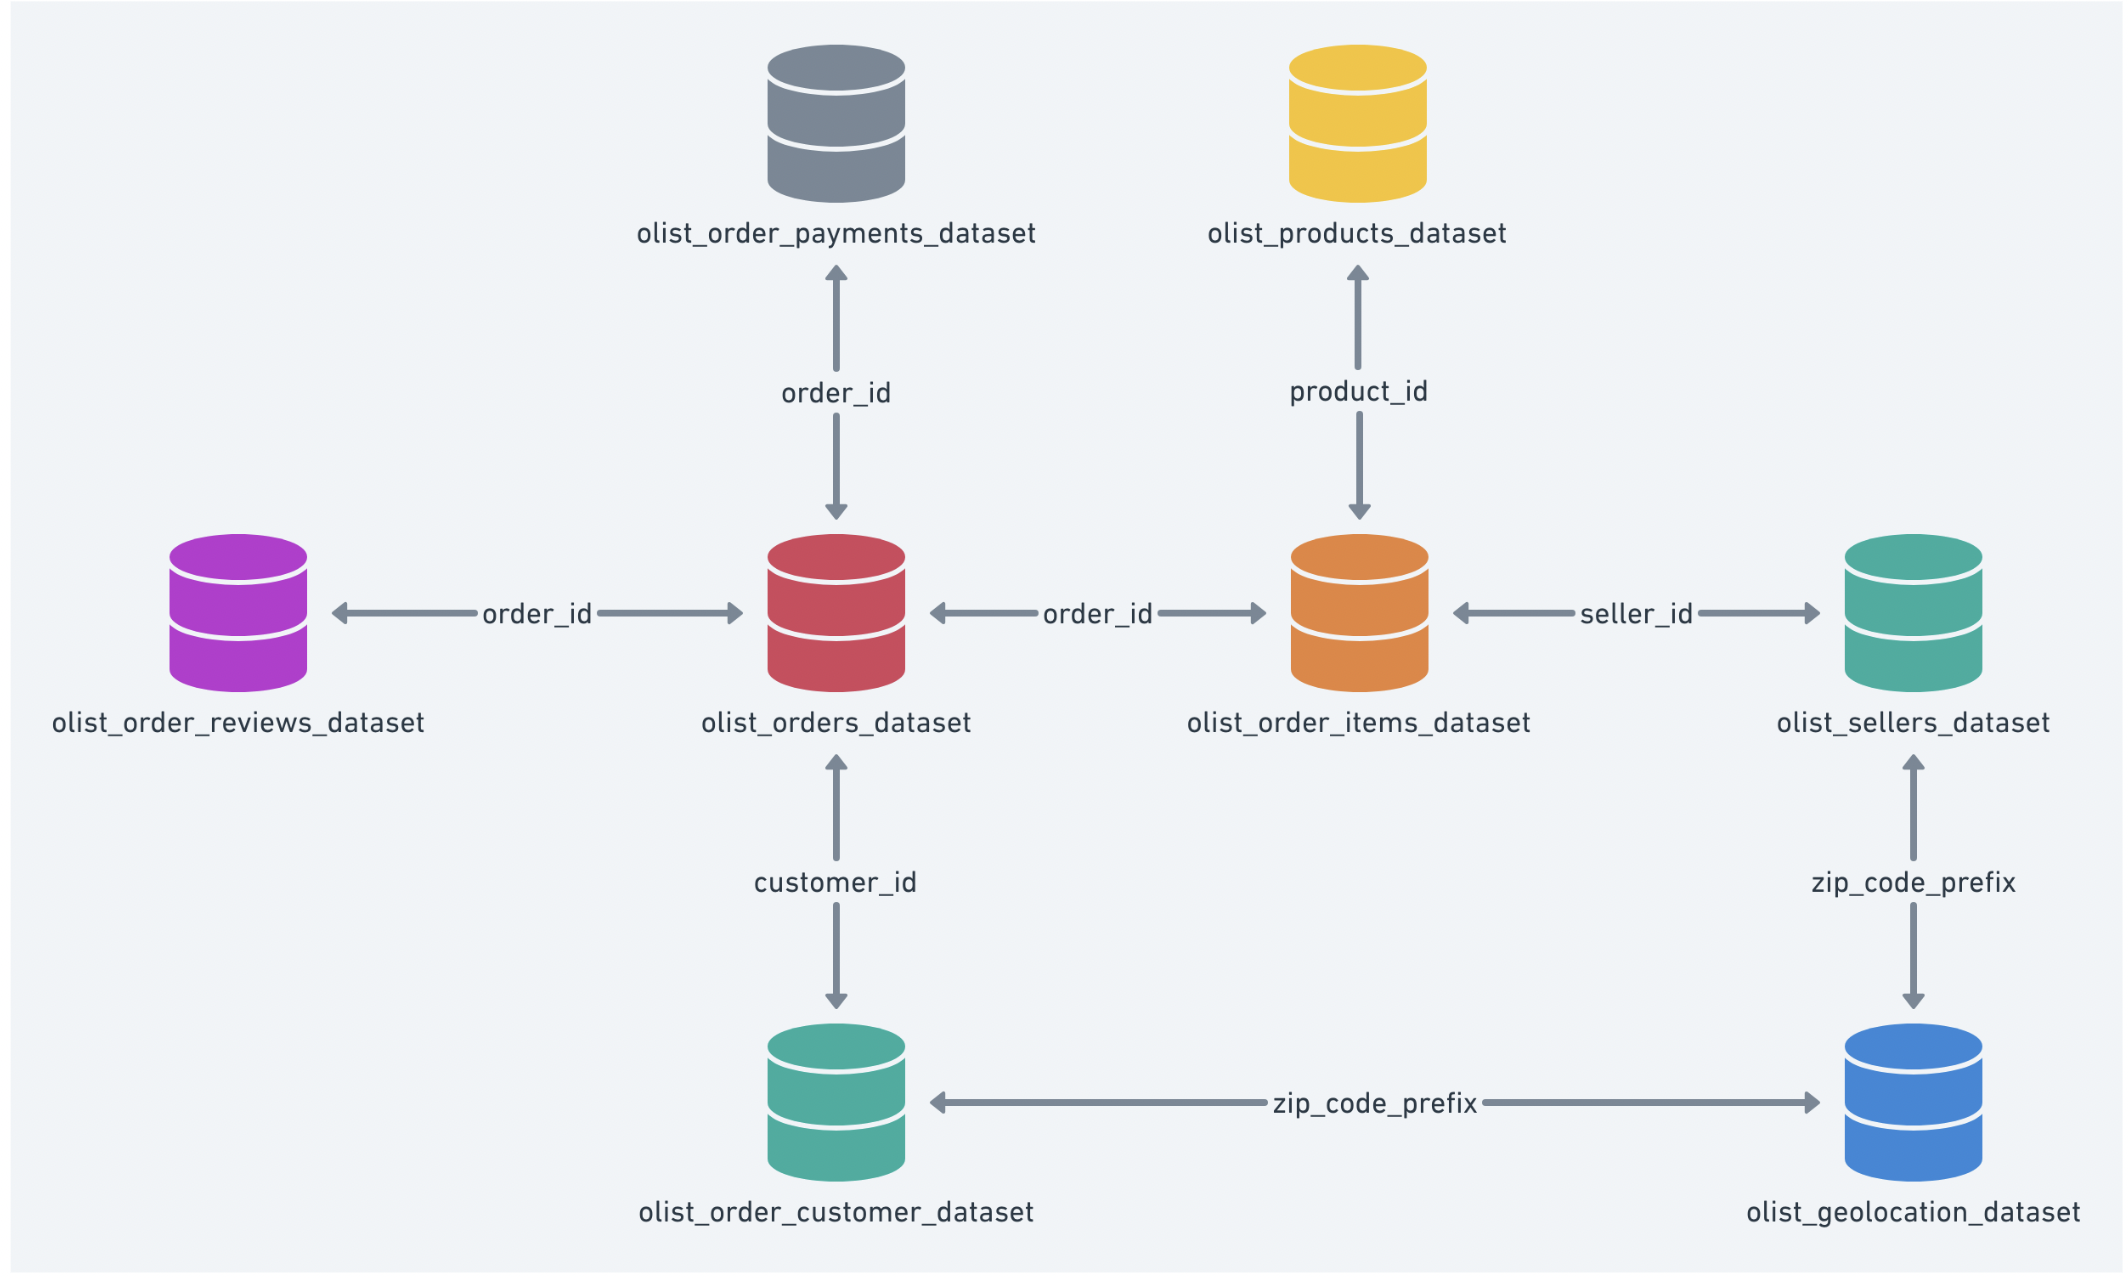


However, we will not be using all the files in this database schema and we will only be focusing on the files that relate to our customers. The dataset contains information for both sellers and buyers but becuase we do not need any information regarding the sellers, we will only be using specific files.


In [ ]:
import pandas as pd
# Importing only the information that is relevant to our project
olist_order = pd.read_csv('gdrive/My Drive/olist_orders_dataset.csv')
olist_item = pd.read_csv('gdrive/My Drive/olist_order_items_dataset.csv')
olist_payment = pd.read_csv('gdrive/My Drive/olist_order_payments_dataset.csv')
olist_product = pd.read_csv('gdrive/My Drive/olist_products_dataset.csv')
olist_customer = pd.read_csv('gdrive/My Drive/olist_customers_dataset.csv')
olist_review = pd.read_csv('gdrive/My Drive/olist_order_reviews_dataset.csv')
olist_translate = pd.read_csv('gdrive/My Drive/product_category_name_translation.csv')


After importing all our files, we will now merge the needed data appropriately to make one dataset...

In [ ]:
# Merging our information to put all the relevant information in one dataset.
df_olist = pd.merge(olist_order, olist_item, on='order_id', how='left')
df_olist = pd.merge(df_olist, olist_product, on='product_id', how='inner')
df_olist = pd.merge(df_olist, olist_payment, on='order_id', how = 'left')
df_olist = pd.merge(df_olist, olist_review, on='order_id', how='left')
df_olist = pd.merge(df_olist, olist_customer, on='customer_id', how='right')
df_olist = pd.merge(df_olist, olist_translate, on='product_category_name', how='inner')


In [ ]:
df_olist.shape
df_olist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116576 entries, 0 to 116575
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       116576 non-null  object 
 1   customer_id                    116576 non-null  object 
 2   order_status                   116576 non-null  object 
 3   order_purchase_timestamp       116576 non-null  object 
 4   order_approved_at              116562 non-null  object 
 5   order_delivered_carrier_date   115363 non-null  object 
 6   order_delivered_customer_date  114061 non-null  object 
 7   order_estimated_delivery_date  116576 non-null  object 
 8   order_item_id                  116576 non-null  float64
 9   product_id                     116576 non-null  object 
 10  seller_id                      116576 non-null  object 
 11  shipping_limit_date            116576 non-null  object 
 12  price                         

##Data Cleaning and Processing

Data cleaning and processing are critical steps of the data science workflow and they involve preparing raw data for analysis. Indeed, the quality of our data significantly impact the results of our analysis and the performance of machine learning models.

After inspecting our data columns, we have identified many columns that are not relevant to our analysis and our customer segmentation. So we are going to remove these columns out of our data.

In [ ]:
# Drop Unused Columns
columns_to_drop = ['order_status', 'order_approved_at', 'order_delivered_customer_date',
                    'order_delivered_carrier_date', 'order_delivered_customer_date',
                    'order_estimated_delivery_date', 'seller_id', 'shipping_limit_date',
                    'product_category_name', 'product_name_lenght', 'product_description_lenght',
                    'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm',
                    'payment_installments', 'review_id', 'review_comment_title', 'review_comment_message',
                    'review_creation_date', 'review_answer_timestamp', 'customer_id', 'customer_city',
                    'customer_state', 'product_photos_qty', 'freight_value', 'payment_sequential']

df_olist_clean = df_olist.drop(columns=columns_to_drop)


Now we have to handle null values in our data.  If we do not do so, this might nullify or compromise all of our other valid data.

To be able to deal with this, let's first check the distribution of null values in our data

In [ ]:
df_olist_clean.isnull().sum()

order_id                           0
order_purchase_timestamp           0
order_item_id                      0
product_id                         0
price                              0
payment_type                       3
payment_value                      3
review_score                     964
customer_unique_id                 0
customer_zip_code_prefix           0
product_category_name_english      0
dtype: int64

As we can see, the proportion of null values compared to the total number of rows is very samll so we can just drop those rows.

In [ ]:
# Drop Missing Values
df_olist_clean.dropna(inplace=True)
df_olist_clean.isnull().sum()

order_id                         0
order_purchase_timestamp         0
order_item_id                    0
product_id                       0
price                            0
payment_type                     0
payment_value                    0
review_score                     0
customer_unique_id               0
customer_zip_code_prefix         0
product_category_name_english    0
dtype: int64

Now we do not have any null values anymore

To ensure data integrity, we will also drop duplicate rows.

In [ ]:
# Drop Duplicate Values
df_olist_clean = df_olist_clean.drop_duplicates()

After inspecting our data, we have realized that some values refered to the same information but are written in slightly different ways. Making these values more consistent will our ensure that our analysis proprely depicts our real life situation.

In [ ]:
# Handling Inconsistent Variable
def format_val(x):
    if x == 'home_appliances_2':
        return "home_appliances"
    elif x == 'home_confort':
        return "home_comfort"
    elif x == "home_comfort_2":
        return "home_comfort"
    return x

df_olist_clean['product_category_name_english'] = df_olist_clean['product_category_name_english'].apply(format_val)

We also need to change our variables to their appropiate data type format.

In [ ]:
# Casting Datatype
df_olist_clean['order_purchase_timestamp'] = pd.to_datetime(df_olist_clean['order_purchase_timestamp'])
df_olist_clean['order_purchase_timestamp'].dt.strftime('%Y-%m-%d')

0         2017-05-16
1         2018-05-19
2         2018-03-13
3         2018-07-08
4         2017-04-02
             ...    
116571    2018-03-07
116572    2017-05-17
116573    2017-10-08
116574    2017-01-26
116575    2017-09-17
Name: order_purchase_timestamp, Length: 114541, dtype: object

Our 'order purchase timestamp' column is going to be very useful thourough our analysis. To be able to effectively extract information out of it, we are going to divide it up into different column for the month, day, year and period.

In [ ]:
# Create New Columns
df_olist_clean['month_order'] = df_olist_clean['order_purchase_timestamp'].dt.month_name()
df_olist_clean['weekday_order'] = df_olist_clean['order_purchase_timestamp'].dt.day_name()
df_olist_clean['month_year_order'] = df_olist_clean['order_purchase_timestamp'].dt.to_period('M').astype(str)
df_olist_clean['date_order'] = df_olist_clean['order_purchase_timestamp'].dt.day


Now let's look at our dataset when to insure there is no missing data, let's look at the dataset one final time...

In [ ]:
df_olist_clean.shape
df_olist_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114541 entries, 0 to 116575
Data columns (total 15 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       114541 non-null  object        
 1   order_purchase_timestamp       114541 non-null  datetime64[ns]
 2   order_item_id                  114541 non-null  float64       
 3   product_id                     114541 non-null  object        
 4   price                          114541 non-null  float64       
 5   payment_type                   114541 non-null  object        
 6   payment_value                  114541 non-null  float64       
 7   review_score                   114541 non-null  float64       
 8   customer_unique_id             114541 non-null  object        
 9   customer_zip_code_prefix       114541 non-null  int64         
 10  product_category_name_english  114541 non-null  object        
 11  

##Exploratory Data Analysis (EDA) — RFM

Exploratory Data Analysis (EDA) is a critical step in the data analysis process, involving the examination and visualization of datasets to uncover patterns, trends, and insights. It helps usunderstand the structure of the data, identify relationships between variables, and discover any anomalies or outliers.

<br>

As businesses collect and visualize vast amounts of customer data during EDA, they often seek deeper insights into customer behavior. This is where RFM (Recency, Frequency, Monetary) analysis becomes instrumental. To properly understand our data and explore it for customer segmentation we will preform RFM as it is more appropriate for what we are trying to do in this project. RFM is a powerful technique used in marketing and data science to evaluate customer behavior by examining three key aspects:

* Recency (R): How recently a customer made a purchase.
* Frequency (F): How often a customer makes a purchase.
* Monetary (M): How much money a customer spends.

By analyzing these dimensions, we will gain a better understanding of their customers' engagement and spending patterns. Therefore, in this section of our EDA we will perform RFM to get insights and an analysis of customer behavior.

But before we perform RFM, let's look at a summary of our descriptive statistics to better understand our data...

In [ ]:
df_olist_clean.describe(include='all')

,order_id,order_purchase_timestamp,order_item_id,product_id,price,payment_type,payment_value,review_score,customer_unique_id,customer_zip_code_prefix,product_category_name_english,month_order,weekday_order,month_year_order,date_order
count,114541,114541,114541.000000,114541,114541.000000,114541,114541.000000,114541.000000,114541,114541.000000,114541,114541,114541,114541,114541.000000
unique,96516,95989,NaN,32171,NaN,4,NaN,NaN,93396,NaN,69,12,7,24,NaN
top,fedcd9f7ccdc8cba3a18defedd1a5547,2017-09-23 14:56:45,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,NaN,credit_card,NaN,NaN,f9ae226291893fda10af7965268fb7f6,NaN,bed_bath_table,August,Monday,2017-11,NaN
freq,34,34,NaN,531,NaN,84963,NaN,NaN,35,NaN,11661,12350,18604,8778,NaN
first,NaN,2016-09-04 21:15:19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2018-09-03 09:06:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.194297,NaN,120.700627,NaN,173.271853,4.033516,NaN,35076.405802,NaN,NaN,NaN,NaN,15.559765
std,NaN,NaN,0.684910,NaN,182.828187,NaN,266.654246,1.385658,NaN,29838.143691,NaN,NaN,NaN,NaN,8.662910
min,NaN,NaN,1.000000,NaN,0.850000,NaN,0.000000,1.000000,NaN,1003.000000,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,1.000000,NaN,39.900000,NaN,61.590000,4.000000,NaN,11320.000000,NaN,NaN,NaN,NaN,8.000000


Before starting our RFM the code below creates a customer-level summary with metrics related to recency, frequency, monetary value, payment type, review score, and most frequently purchased product category to help us preform our RFM and more EDA.

In [ ]:
import datetime as dt
# Max time
max_time = df_olist_clean['order_purchase_timestamp'].max() + dt.timedelta(1)

# Groupby customer_unique_id
customer = df_olist_clean.groupby('customer_unique_id', as_index=False).agg(
    recency =  ('order_purchase_timestamp', lambda x: (max_time-x.max()).days),
    frequency = ('order_id', 'count'),
    monetary =  ('payment_value', 'sum'),
    most_payment_type = ('payment_type', lambda x: x.value_counts().index[0]),
    avg_review_score = ('review_score', 'mean'),
    most_product_buy = ('product_category_name_english', lambda x: x.value_counts().index[0]),
)


### Recency:

The "Recency" metric in RFM analysis refers to the duration since the customer's latest purchase. A lower recency value is more favorable, indicating a shorter time since the customer's last transaction. Below is a box plot and distribution of the recency metric.

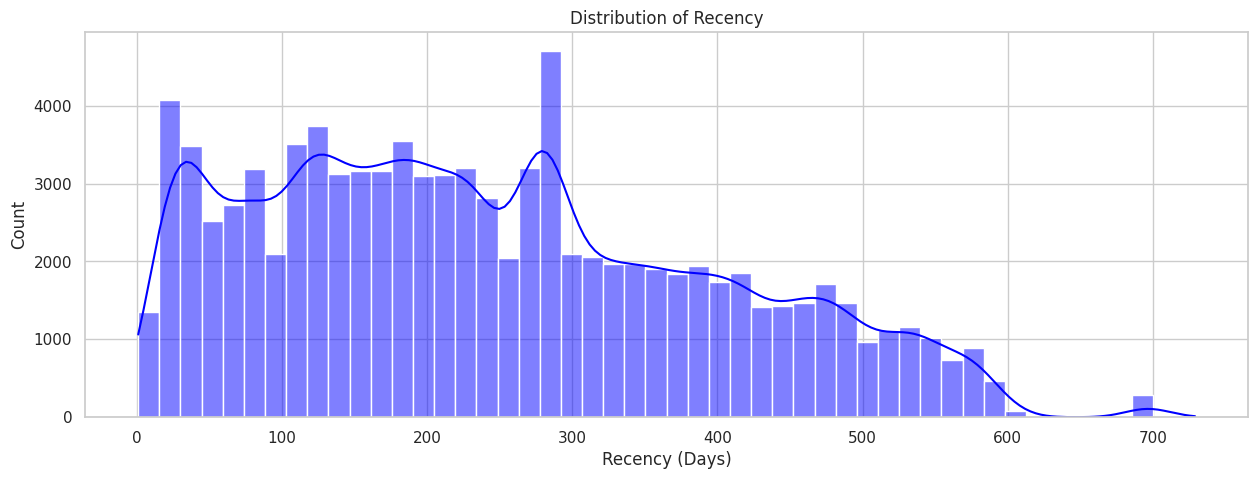

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Plotting Recency
plt.figure(figsize=(15, 5))
sns.histplot(customer['recency'], bins=50, kde=True, color='blue')
plt.title('Distribution of Recency')
plt.xlabel('Recency (Days)')
plt.ylabel('Count')
plt.show()

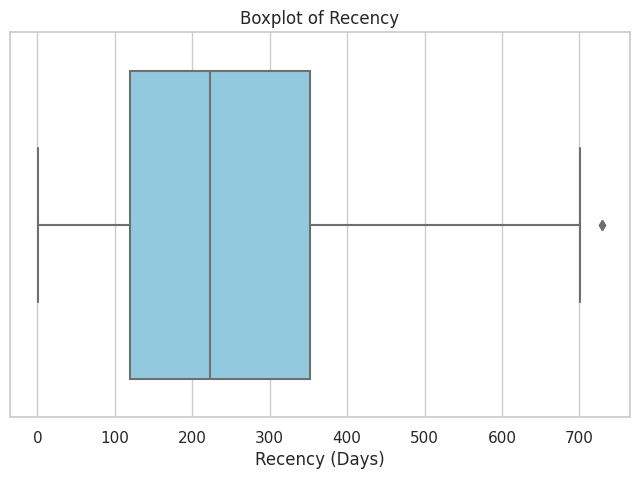

In [ ]:
# Create separate subplot for Recency
plt.figure(figsize=(8, 5))
sns.boxplot(x=customer['recency'], color='skyblue')
plt.title('Boxplot of Recency')
plt.xlabel('Recency (Days)')
plt.show()

Explanation: Analyzing the recency graph reveals that, on average, customers tend to make a new transaction approximately every 243 days. This translates to an engagement frequency of roughly every 8 months, calculated from the latest order date. Understanding this pattern provides insights into the typical time lapse between consecutive transactions for Olist customers.

### Frequency:

Frequency is the Number of transactions. It is a crucial metric, as a higher number signifies more frequent customer activity. This is an important metric for Olist because it indicates if customers are engaged in transactions frequently which would contribute positively to the overall business performance. Below is a box plot and distribution of the Frequency metric.

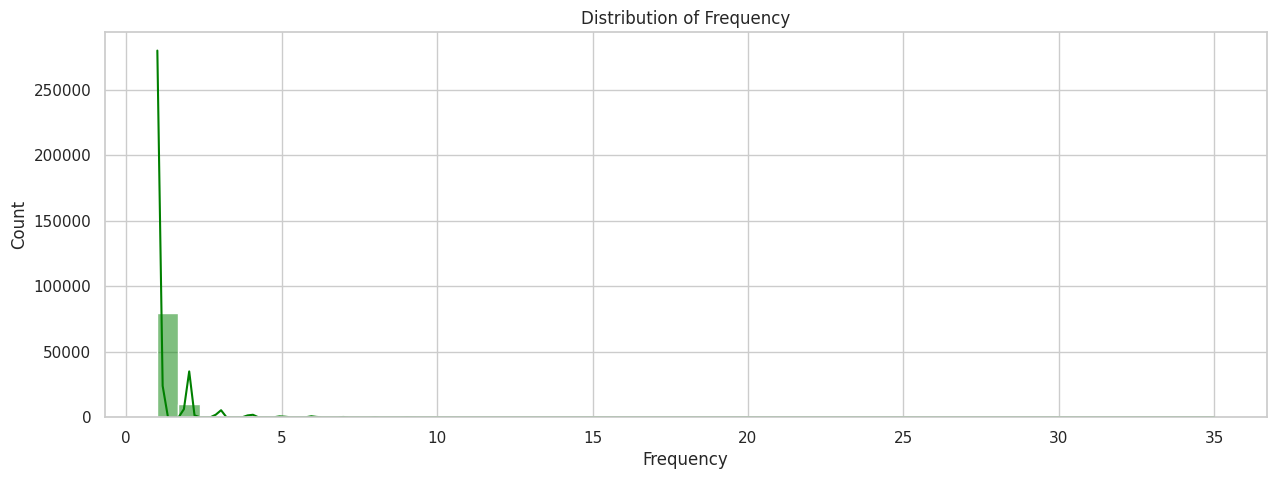

In [ ]:
# Plotting Distribution of Frequency:
plt.figure(figsize=(15, 5))
sns.histplot(customer['frequency'], bins=50, kde=True, color='green')
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

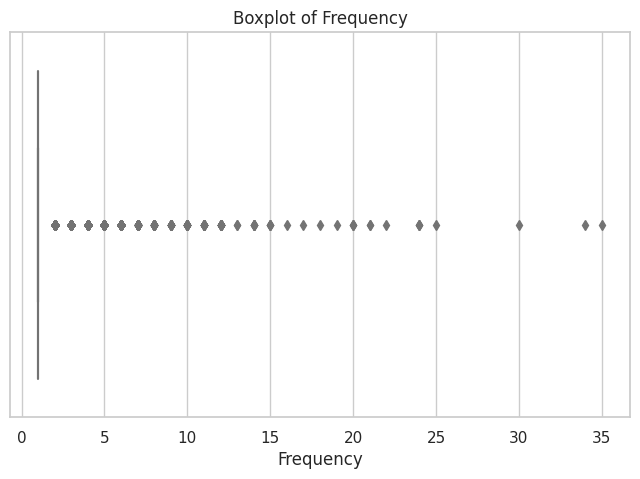

In [ ]:
# Plotting of Frequency:
plt.figure(figsize=(8, 5))
sns.boxplot(x=customer['frequency'], color='lightgreen')
plt.title('Boxplot of Frequency')
plt.xlabel('Frequency')
plt.show()

Explanation: According to the frequency graph and boxplot, customers typically place just one order when using this e-commerce platform. Therefore, to enhance customer engagement and boost transaction numbers, targeted marketing strategies aligned with customer segmentation should be implemented.

### Monetary:

Monetary is the purchasing capability of a customer or their "spending power". A higher value is desirable as it indicates that the customer engages in significant spending.

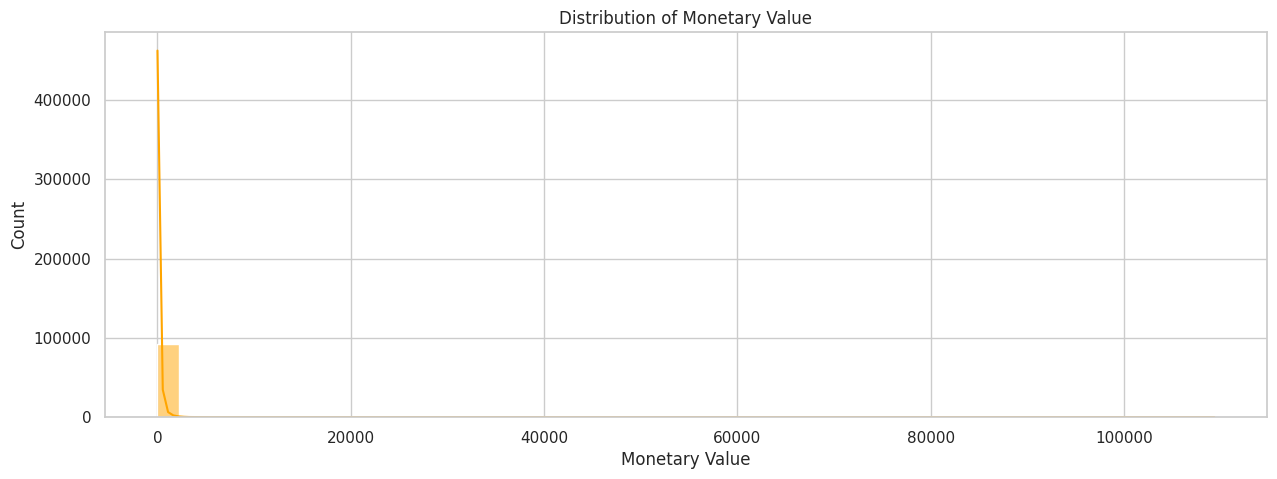

In [ ]:
# Plotting Monetary
plt.figure(figsize=(15, 5))
sns.histplot(customer['monetary'], bins=50, kde=True, color='orange')
plt.title('Distribution of Monetary Value')
plt.xlabel('Monetary Value')
plt.ylabel('Count')
plt.show()

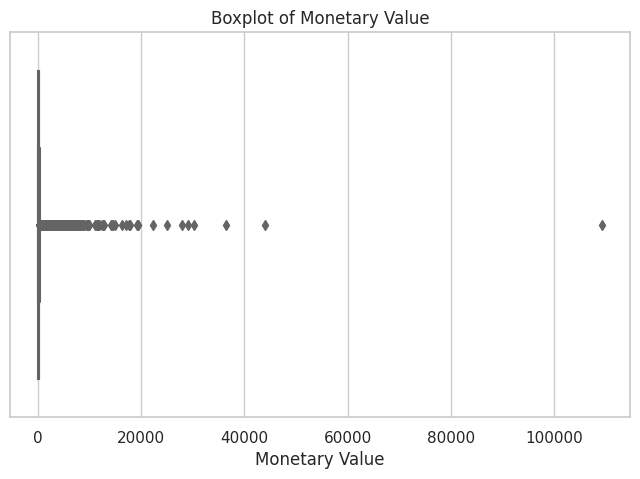

In [ ]:
# Create boxplot of Monetary:
plt.figure(figsize=(8, 5))
sns.boxplot(x=customer['monetary'], color='coral')
plt.title('Boxplot of Monetary Value')
plt.xlabel('Monetary Value')
plt.show()

Explanation: According to the monetary graph, the total purchases from each customer vary between R\$   and R$ 1493, with an average of R\$  174. This suggests that the majority of customers exhibit relatively low purchasing power.


A pairplot is a visual way to see how different variables in a dataset relate to each other. This plot illustrates the distribution and relationships between the variables Recency, Frequency, and Monetary in our dataset. The diagonal histograms reveal that many observations have a low recency value. In the lower triangle, the scatter plots depict relationships between two variables, with Recency and Frequency showing no clear pattern. Recency and Monetary exhibit outliers with high monetary values irrespective of recency, and no clear linear pattern is evident. Frequency and Monetary reveal a concentration of points at lower values, suggesting that higher frequency and monetary values are less common. This pairplot aligns with the principles of RFM analysis used in customer segmentation, hinting that recent, infrequent, and low-monetary transactions are predominant in our dataset.

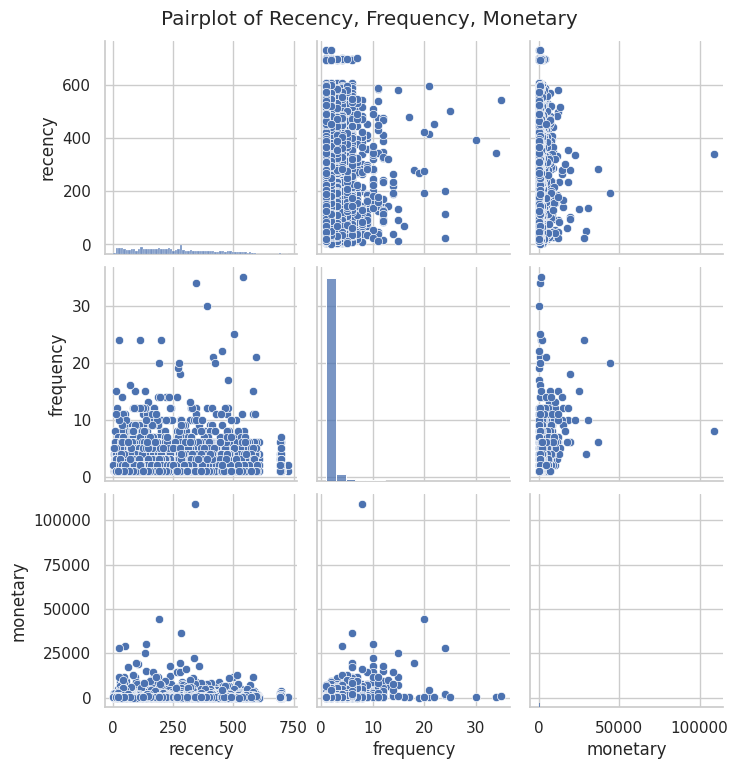

In [ ]:
# Pairplot for Recency, Frequency, Monetary
sns.pairplot(customer[['recency', 'frequency', 'monetary']])
plt.suptitle('Pairplot of Recency, Frequency, Monetary', y=1.02)
plt.show()

### More EDA:

Below are some other analysis and istributions that were done for us to better understnad our dataset more.

This plot examines the distribution of review scores in the dataset. Notably, the graph reveals that the most frequent review score is 5, indicating a high level of customer satisfaction. Following closely, the review score of 4 is also quite prevalent. On the other end of the spectrum, the least frequent review score recorded in our dataset is 2, suggesting that lower scores are relatively rare and indicating an overall positive trend in customer reviews.

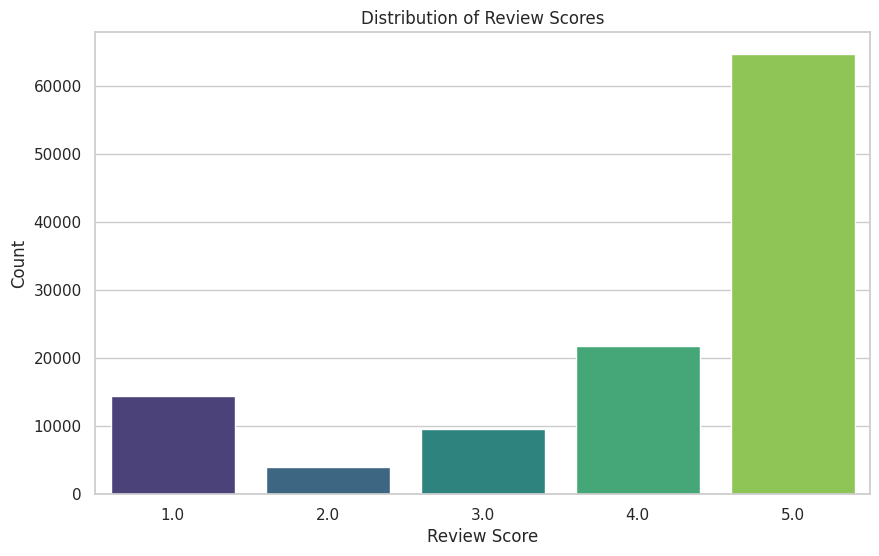

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='review_score', data=df_olist_clean, palette='viridis')
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.show()

This plot looks into the distribution of payment methods used by customers. The barplot illustrates that the most commonly chosen payment method is credit card, reflecting a prevalent preference for this mode of transaction. Following credit card payments, boleto is the second most frequent method among customers. In contrast, debit card transactions appear to be less common, as it is the least frequent payment method. Vouchers, while more prevalent than debit cards, are still observed to be less frequently used compared to credit cards and boleto. This detailed insight into payment method distribution provides valuable information for understanding customer preferences and guiding strategic decisions related to payment options.

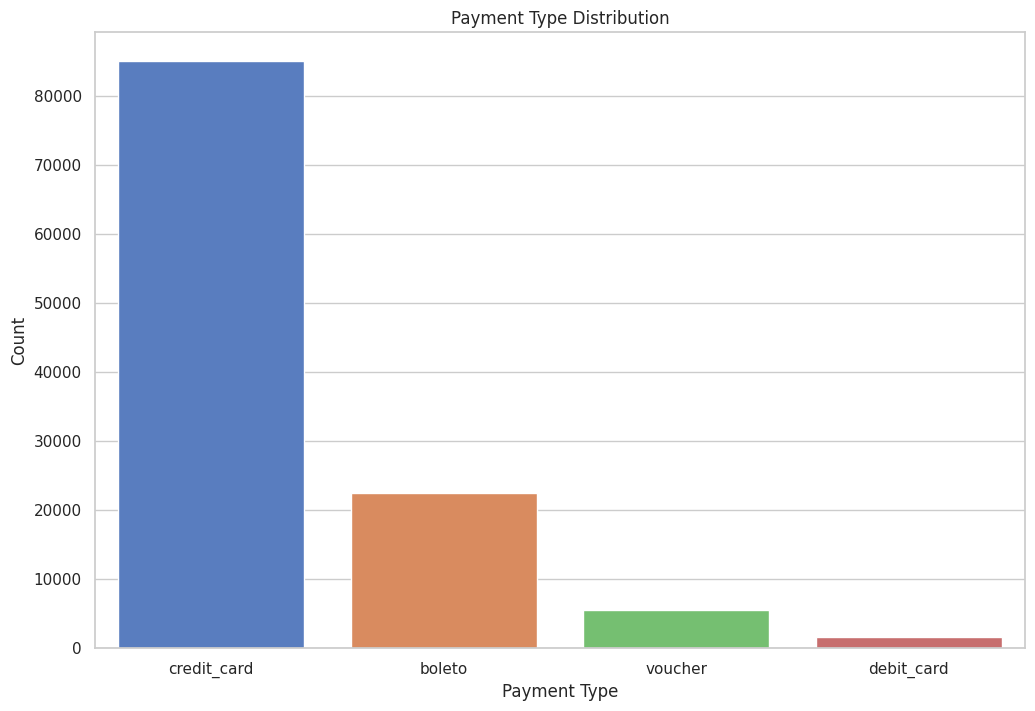

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='payment_type', data=df_olist_clean, palette='muted')
plt.title('Payment Type Distribution')
plt.xlabel('Payment Type')
plt.ylabel('Count')
plt.show()

This plot shows the preferred days for placing orders. The data highlights that Monday and Tuesday emerge as the most popular days for order placement, indicating a higher volume of transactions during the early weekdays. In contrast, Saturday and Sunday are observed to be the least popular days for order placement, suggesting a potential decline in customer activity over the weekend. Understanding these trends in the weekly ordering patterns can inform operational decisions, helping businesses optimize resources and enhance customer service during peak order days.



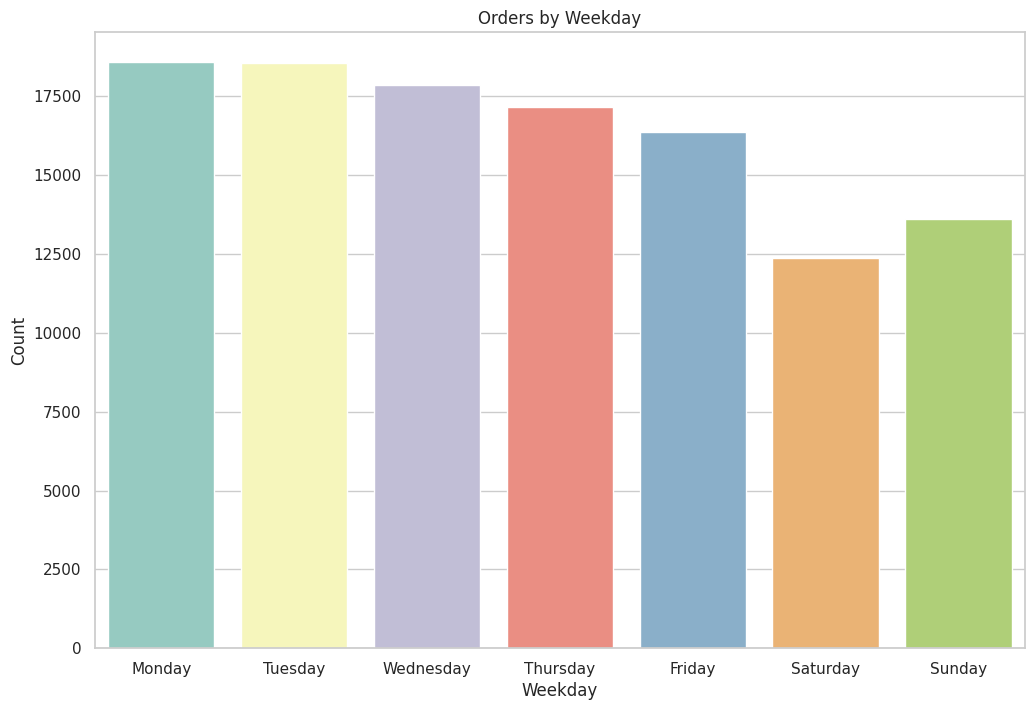

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(x='weekday_order', data=df_olist_clean, palette='Set3', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Orders by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.show()

This plot is a Time Series plot which shows the "Daily Order Count Over Time". This plot reveals fluctuations in daily order counts from October 2017 to July 2018. However, there is a notable peak exceeding 1200 orders, suggesting a specific event or promotion. Overall, the graph indicates a relatively stable trend with minor fluctuations around a potential average order count line.

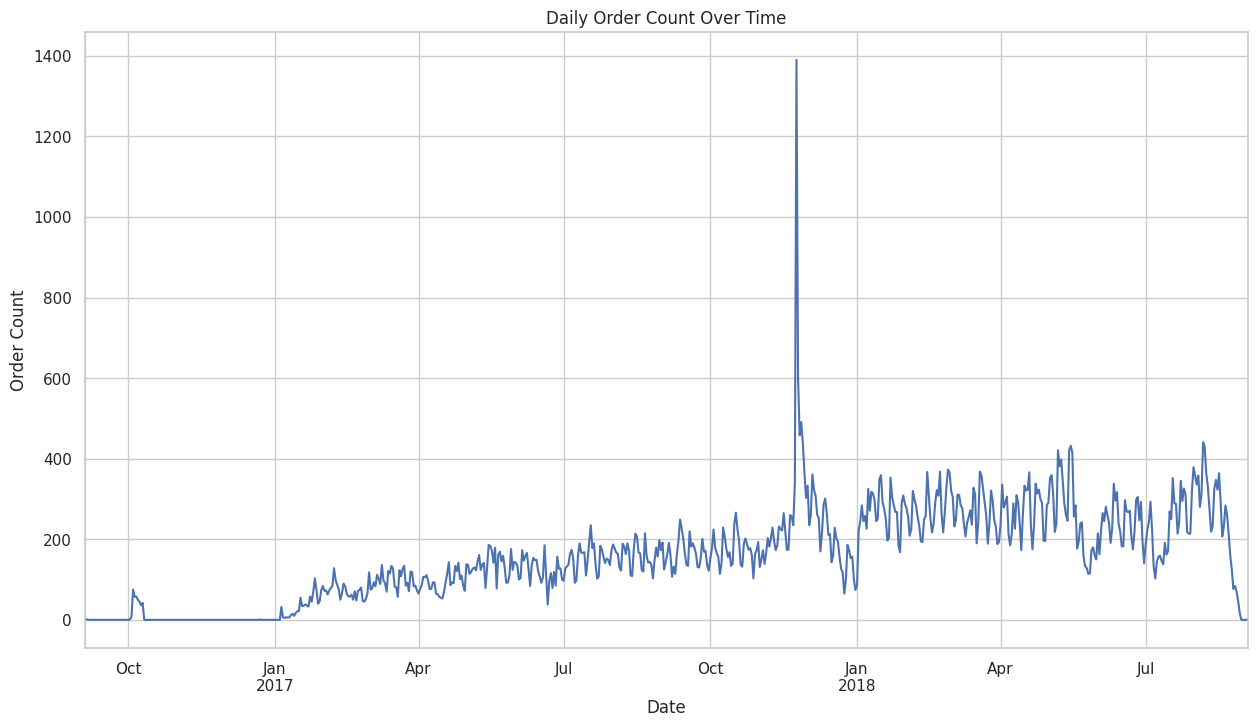

In [ ]:
# Time series analysis
time_df = df_olist_clean.copy()
time_df.set_index('order_purchase_timestamp', inplace=True)
plt.figure(figsize=(15, 8))
time_df.resample('D')['order_id'].count().plot()
plt.title('Daily Order Count Over Time')
plt.xlabel('Date')
plt.ylabel('Order Count')
plt.show()

This plot looks at the popularity of product categories, showcasing bed_bath_table as the most purchased, followed by health_beauty. Conversely, security_and_services is the least favored category. Understanding these preferences helps businesses tailor their marketing and inventory strategies.

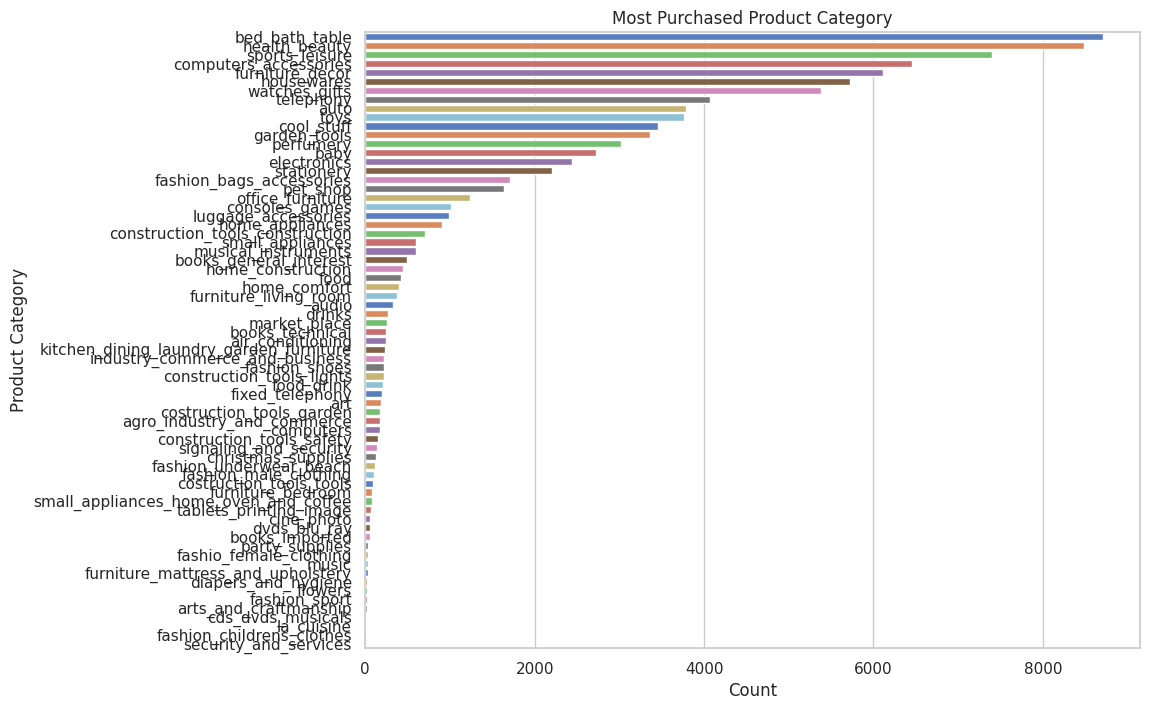

In [ ]:
# Bar plot for Most Purchased Product Category (Horizontal)
plt.figure(figsize=(10, 8))
sns.countplot(y='most_product_buy', data=customer, palette='muted', order=customer['most_product_buy'].value_counts().index)
plt.title('Most Purchased Product Category')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

We wanted to look at the top 5 categories...

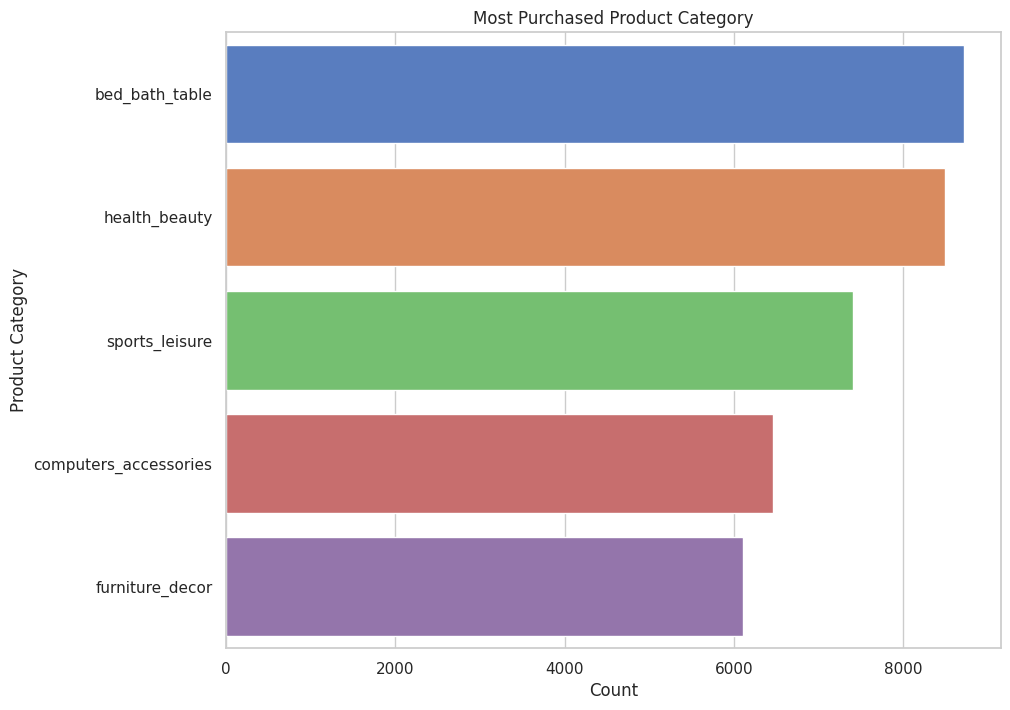

In [ ]:
# Bar plot for Most Purchased Product Category (Horizontal) - Showing only top N categories
top_categories = 5  # Adjust the number as needed
plt.figure(figsize=(10, 8))
sns.countplot(y='most_product_buy', data=customer, palette='muted', order=customer['most_product_buy'].value_counts().index[:top_categories])
plt.title('Most Purchased Product Category')
plt.xlabel('Count')
plt.ylabel('Product Category')
plt.show()

Below is a correlation heatmap to visually assess the relationships and strength of associations between different variables in our dataset. The heatmap shows that most variables have a relatively low correlation except payment_value and price which makes sense as they both involve financial aspects of the transactions, indicating a logical connection between the amount paid and the product price.

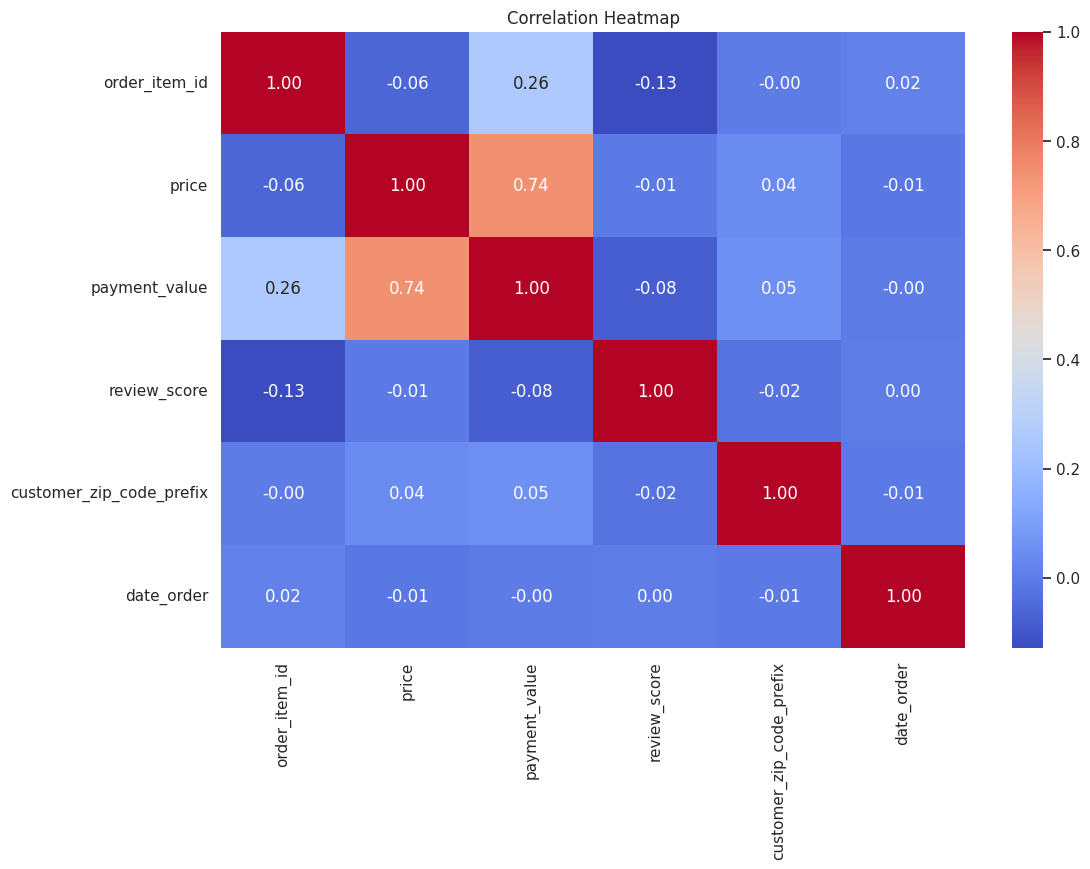

In [ ]:
# Identify numerical columns
numeric_columns = df_olist_clean.select_dtypes(include=['float64', 'int64']).columns

# Create a correlation matrix for numerical columns
correlation_matrix = df_olist_clean[numeric_columns].corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##Modeling (K-Means Clustering using RFM Features)

No that we have analyze our data and we understand better its variations, we can proceed to the modelling. The essence of customer segmentation is clustering. Clustering is grouping our data points into different categories based on a set of characteristics.

There are many clustering algorithm but for the purpose of this project we will be using the k means algorithm. We are making this choice because of the scalability capacity of the k means algorithm but also because of its speed, versatility and ease of interpretation.

So what is k means algorithm? It is essentially a unpervised machine learning model that partitions dataset into k clusters, where each data point belongs to the cluster with the nearest mean. k represents the number of clusters we want to identify.

First, to perform k mean clustering we need to identify the number of clusters we would like to use in our model. A commonly used method to identify the optimal number of cluster for the k means algorithm is the elbow method.

The elbow method consists of plotting the Within-Cluster-Sum-of-Squares for different cluster numbers and identifying the 'elbow' point where WCSS starts to level off. The Within-Cluster-Sum-of-Squares is the sum of squared distance between each point and the centroid in a cluster.

Let's plot our elbow method graph!



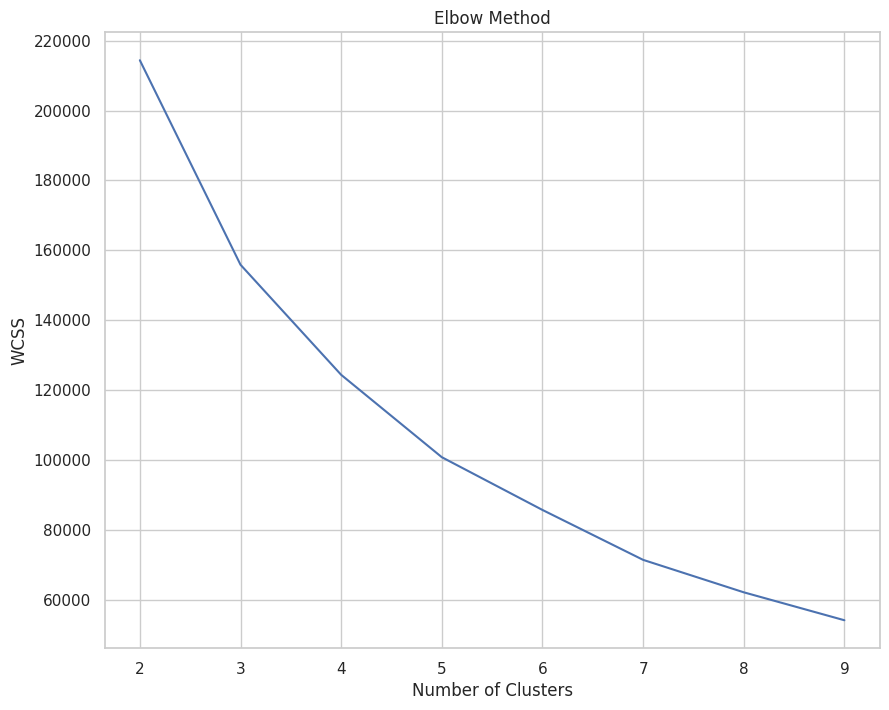

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Data
x = customer[['recency', 'frequency', 'monetary']]

# Scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Calculate Within-Cluster Sum of Squares (WCSS) for Elbow Method
wcss_values = []
for num_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=11)
    kmeans.fit(x_scaled)
    wcss_values.append(kmeans.inertia_)

# Elbow Method
plt.figure(figsize=(10, 8))
plt.plot(range(2, 10), wcss_values)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()


When we analyze the graph, we can see that the graph rapidly changes at 4 creating an elbow shape. From this point, the graph moves almost parallel to the X-axis. Therefore, 4 is the optimal value of k or optimal number of clusters.

Now that we know the number of clusters we have, we will proceed to the next part of the k means algprithm where we assign each data point to the cluster to its nearest centroid essentially forming the clusters.

Let's write the code to create the clusters

In [ ]:
# Perform KMeans clustering with 4 clusters
num_clusters = 4
kmeans_model = KMeans(n_clusters=num_clusters, init='k-means++', random_state=11)
kmeans_model.fit(x_scaled)

# Assign cluster labels to the customer data
customer['label_kmeans'] = kmeans_model.labels_


Now that we have the clusters, let's label them. After researching on the E-commerce company, we have found a report where they identified these categories of customers: Lost Customers, New Customers, Loyal Customers, Best Customers. We will be using these to label our 4 clusters.

In [ ]:
kmeans_labels = [0, 1, 2, 3]

# Mapping dictionary for numerical labels to corresponding names
label_mapping = {
    0: 'Lost Customers',
    1: 'New Customers',
    2: 'Loyal Customers',
    3: 'Best Customers'
}

# Map numerical labels to names
customer['label_kmeans'] = customer['label_kmeans'].map(label_mapping)

Now that we have labelled our clusters, we need find what characterize each our clusters through the RFM metrics.

We are essentially asking these questions:
Recency: How recent are there purchases ?
Frequency: How often do they make a purchase ?
Monetary: How much do they spend when they make a purchase ?

To do this, let's vizualize our clusters in terms of their value of Recency, Frequency and Monetary!

First, we can look at the barplot of the labels for each RFM metric:

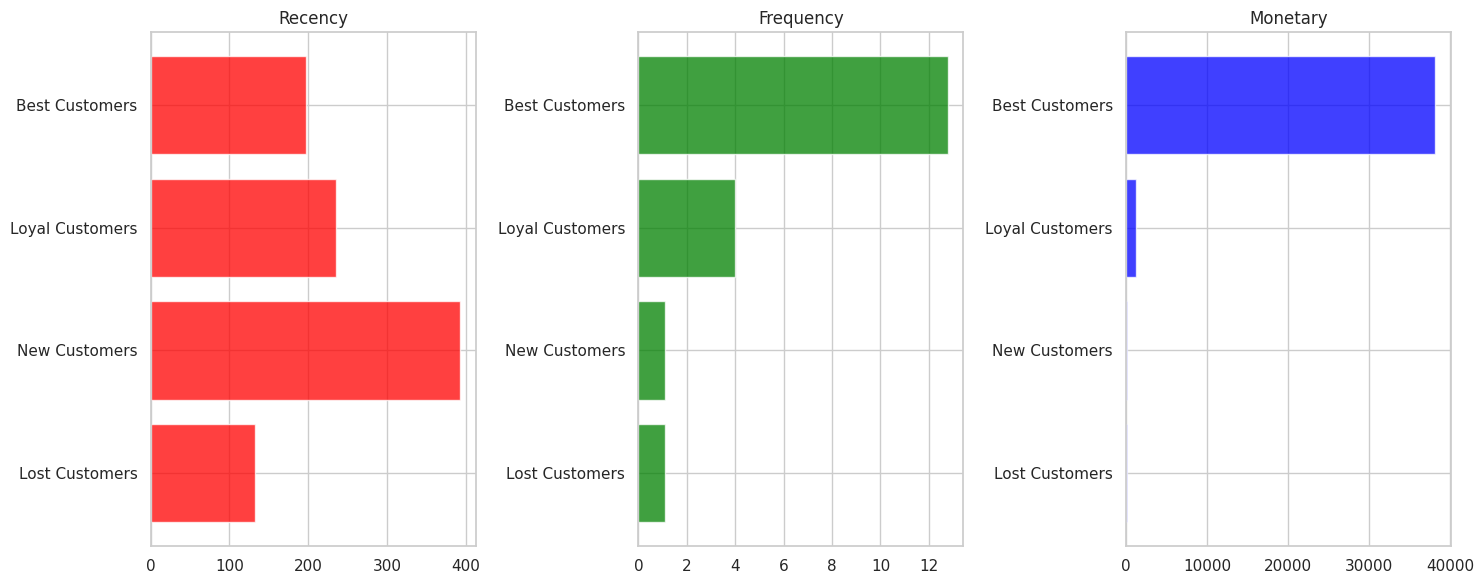

In [ ]:
# Data
segments = ['Lost Customers', 'New Customers', 'Loyal Customers', 'Best Customers']
recency_values = [132.28, 392.90, 235.65, 197.33]
frequency_values = [1.11, 1.12, 3.99, 12.78]
monetary_values = [170.13, 170.22, 1202.00, 38201.29]

# Set up figure and axis
fig, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Recency Plot
axes[0].barh(segments, recency_values, color='red', alpha=0.75)
axes[0].set_title('Recency')

# Frequency Plot
axes[1].barh(segments, frequency_values, color='green', alpha=0.75)
axes[1].set_title('Frequency')

# Monetary Plot
axes[2].barh(segments, monetary_values, color='blue', alpha=0.75)
axes[2].set_title('Monetary')

# Adjust layout
plt.tight_layout()
plt.show()

For Recency, we can see that the 'New Customers' cluster have the highest value and the 'Lost Customers' the lowest one.

For Frequency, the 'Best Customers' have the highest Frequency followed by the 'Loyal Customers' cluster, and the 'Lost Customers' have the lowest value.

For Monetary, the 'Best Customers' cluster have the highest amount spend followed by the 'Loyal Customers' which have a very low monetary value compared to the 'Best Customers'. The New Customers and Lost Customers monetary values are very low in proportion to the other ones which explains why they are not visible in the graph.

To gain more insight, let's make a 2D scatterplot to compare our clusters by 2 metrics of the RFM:

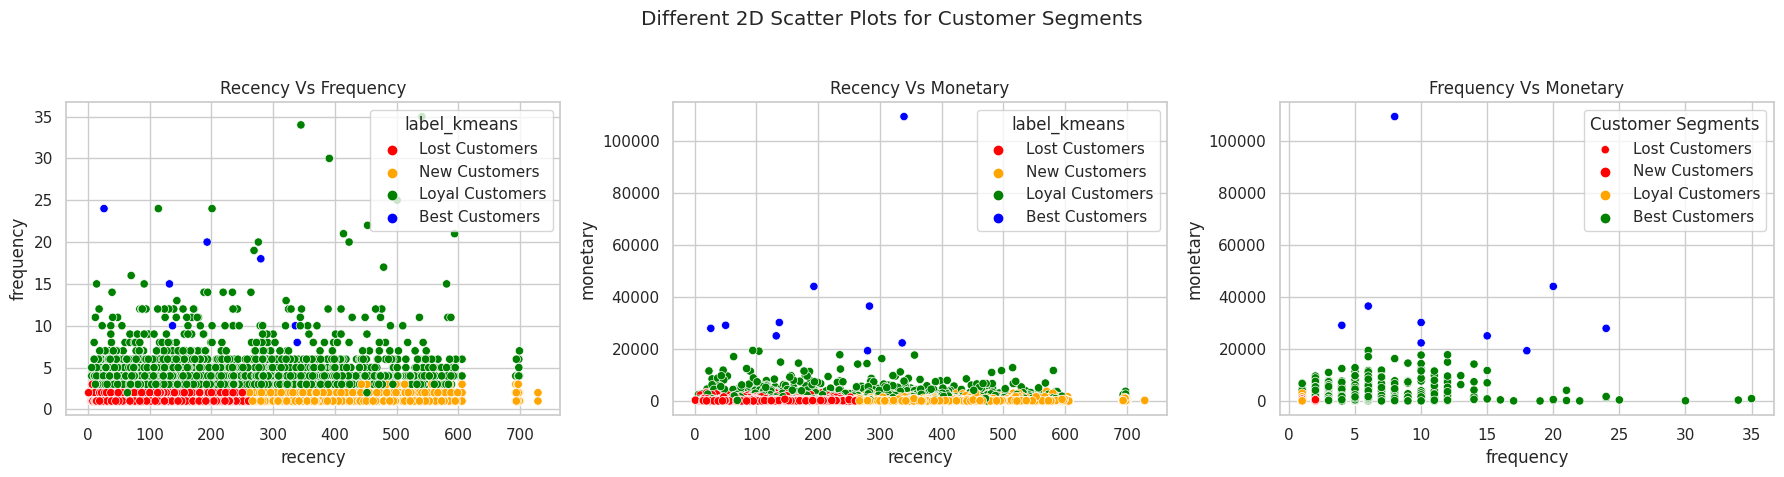

In [ ]:
# 2D Scatter Plot
plt.figure(figsize=(18, 5))

# Scatter Plot: Recency vs Frequency
plt.subplot(131)
scatter_recency_frequency = sns.scatterplot(x='recency', y='frequency', hue='label_kmeans', data=customer, palette=['red', 'orange', 'green', 'blue'])
plt.title('Recency Vs Frequency')

# Scatter Plot: Recency Vs Monetary
plt.subplot(132)
scatter_recency_monetary = sns.scatterplot(x='recency', y='monetary', hue='label_kmeans', data=customer, palette=['red', 'orange', 'green', 'blue'])
plt.title('Recency Vs Monetary')

# Scatter Plot: Frequency Vs Monetary
plt.subplot(133)
scatter_frequency_monetary = sns.scatterplot(x='frequency', y='monetary', hue='label_kmeans', data=customer, palette=['red', 'orange', 'green', 'blue'])
plt.title('Frequency Vs Monetary')

# Adjust layout
plt.suptitle('Different 2D Scatter Plots for Customer Segments')

# Customize legends with the desired labels
plt.legend(title='Customer Segments', labels=['Lost Customers', 'New Customers', 'Loyal Customers', 'Best Customers'], loc='upper right')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

We can now clearly see that the 'Lost Customers' cluster do have a low recency and low Frequency as well as a low monetary value.

Similar to the 'Lost Customers' cluster, the 'New Customers' have a low frequency and low monetary value. The difference between the 2 is that the 'New Customers' have a high Recency.

For the 'Loyal Customers' cluster, they have a high Frequency, high Recency and a high average Monetary value greater than the ones for the 'Lost Customers' and the 'New Customers'.

Regarding the 'Best Customers' Cluster, it has the highest frequency and monetary value and an average recency.

Let's make a 3D plot so we can visualize these 3 metrics of our clusters all in the same graph:


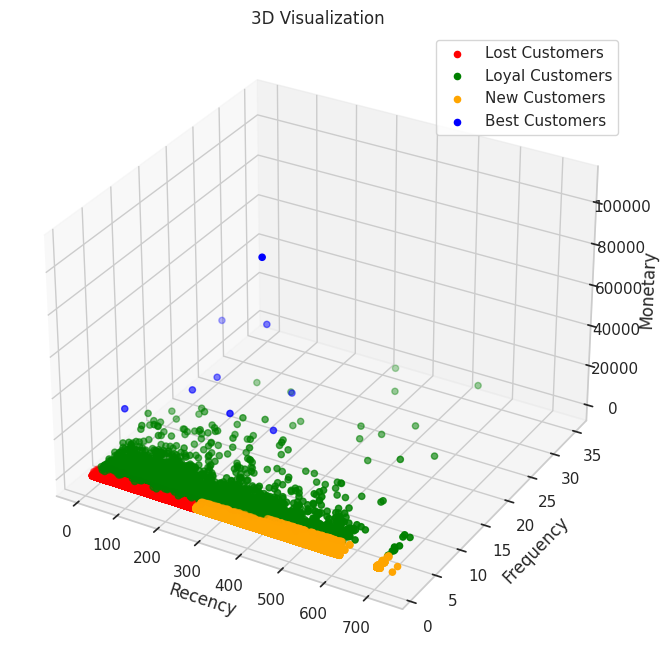

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter3D(customer['recency'][customer.label_kmeans == 'Lost Customers'],
           customer['frequency'][customer.label_kmeans == 'Lost Customers'],
           customer['monetary'][customer.label_kmeans == 'Lost Customers'],
           c='red', label='Lost Customers')
ax.scatter3D(customer['recency'][customer.label_kmeans == 'Loyal Customers'],
           customer['frequency'][customer.label_kmeans == 'Loyal Customers'],
           customer['monetary'][customer.label_kmeans == 'Loyal Customers'],
           c='green', label='Loyal Customers')
ax.scatter3D(customer['recency'][customer.label_kmeans == 'New Customers'],
           customer['frequency'][customer.label_kmeans == 'New Customers'],
           customer['monetary'][customer.label_kmeans == 'New Customers'],
           c='orange', label='New Customers')
ax.scatter3D(customer['recency'][customer.label_kmeans == 'Best Customers'],
           customer['frequency'][customer.label_kmeans == 'Best Customers'],
           customer['monetary'][customer.label_kmeans == 'Best Customers'],
           c='blue', label='Best Customers')

plt.title('3D Visualization')
plt.xlabel('Recency')
plt.ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.legend()

plt.show()

We can now analyze our 3 RFM metrics for the 4 clusters by looking at one graph.

We essentially have the same intepretation of results.

* 'New Customers' tend to have a high recency, low frequency and low monetary value.

* 'Lost Customers' tend to have a low recency, low frequency and low monetary value.

* 'Loyal Customers' tend to have high recency, high frequency and high monetary value.

* 'Best Customers' tend to have an average recency, high frequency and extremely high monetary value.

Let's now make a radar chart to have a better visualization of the variations and gap between the 4 different clusters.

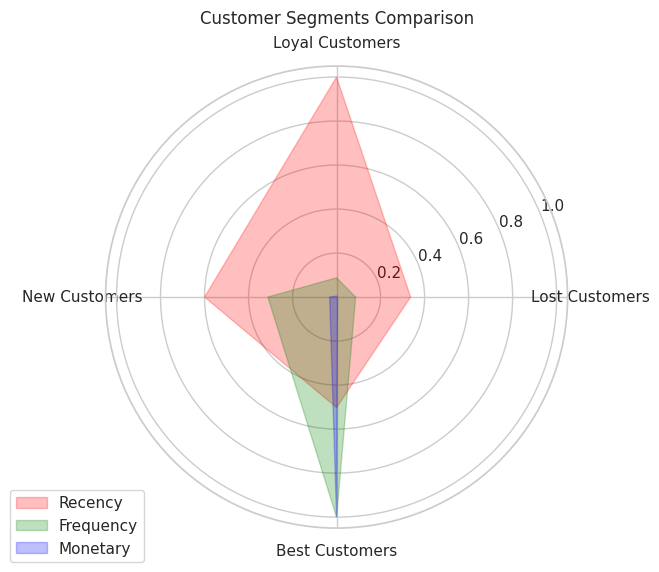

In [ ]:
# Data
customer_segments = ['Lost Customers', 'Loyal Customers', 'New Customers', 'Best Customers']
recency_values = [132.28, 392.90, 235.65, 197.33]
frequency_values = [1.11, 1.12, 3.99, 12.78]
monetary_values = [170.13, 170.22, 1202.00, 38201.29]

# Normalize data
max_recency, max_frequency, max_monetary = max(recency_values), max(frequency_values), max(monetary_values)

normalized_recency = [val / max_recency for val in recency_values]
normalized_frequency = [val / max_frequency for val in frequency_values]
normalized_monetary = [val / max_monetary for val in monetary_values]

# Number of variables
num_dimensions = len(customer_segments)

# Compute angle for each axis
angles = np.linspace(0, 2 * np.pi, num_dimensions, endpoint=False).tolist()

# Radar plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, normalized_recency, color='red', alpha=0.25, label='Recency')
ax.fill(angles, normalized_frequency, color='green', alpha=0.25, label='Frequency')
ax.fill(angles, normalized_monetary, color='blue', alpha=0.25, label='Monetary')

# Customize the plot
ax.set_thetagrids(np.degrees(angles), customer_segments)
ax.set_title('Customer Segments Comparison', va='bottom')
ax.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

plt.show()


Now that we know what characterize each of our clusters, we can also notice in our graphs that the some clusters have more datapoints than others.

Let's plot a barchart to look at the distribution of our customers among the 4 clusters:


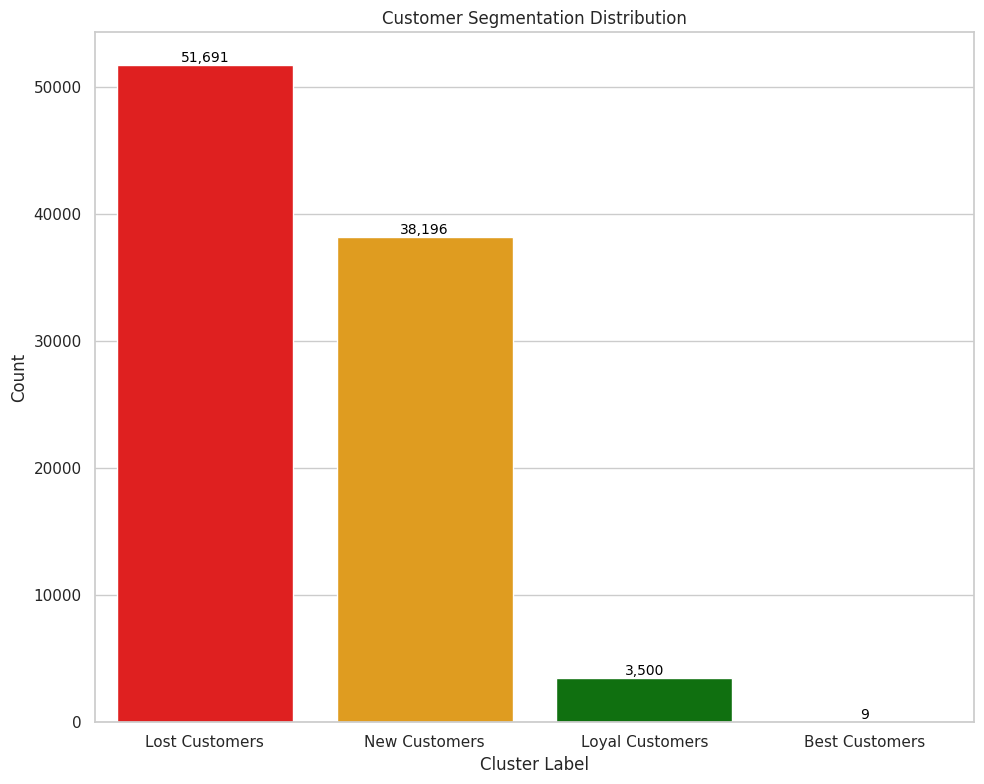

In [ ]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Create a count plot using Seaborn
plots = sns.countplot(x='label_kmeans', data=customer, palette=['red', 'orange', 'green', 'blue'])

# Add annotations to each bar in the count plot
for bar in plots.patches:
    # Annotate with the count value formatted as a comma-separated integer
    plots.annotate(f'{bar.get_height():,.0f}',
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                   ha='center', va='bottom', fontsize=10, color='black')

# Set plot title
plt.title('Customer Segmentation Distribution')

# Set x-axis label
plt.xlabel('Cluster Label')

# Set y-axis label
plt.ylabel('Count')

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()

We can clearly see that the 'Lost Customers' cluster has the highest distribution with around 51,691 customers. Following it, we also have the 'New Customers' cluster with a pretty high distribution of around 38,196 customers. In contrast, there is a very low amount of customers ≈ 3500 in the 'Loyal Customers' cluster and an even smaller amount in the Best Customers cluster ≈ 9.

Now that we have enough insights about our clusters, let's articulate our findings.

##Findings

Through our customer segmentation, we have found 4 groups of customers: Best Customers, Loyal Customers, New Customers and Lost Customers.

* 'Best customers' are categorized as the customers that made purchases recently, made many purchases from the company and have the highest total value of transactions.

* 'Loyal customers' are categorized as the customers that made purchases recently, made various purchases from the company and have a high total value of purchase.

* 'New customers' are categorized as the customers that made purchases very recently, have a very low amount of purchases or even only one purchase and have a low value of transactions.

* 'Lost customers' are categorized as the customers that have not made a purchase for a very long time, have a very low amount of purchase or even only one and have the lowest value of transactions.

##Conclusion

We have arrive to the end of our Customer Segmentation project. Let's recap, we had our E-commerce data and we wanted to perform customer segmentation to identify the different categories of customers that the E-commerce has so that we can make targeted marketing to those different groups. First, we collected our dataset through kaggle and since our data included various files, we had to merge them all together. Second, we cleaned and proprely processed our data by dropping unused columns, dropping null values, handling inconsistent variables, casting datatype and reform some of our columns. Then, we did an exploratory data analysis to be able to understand better our data and its variations specially in terms of RFM: Recency, Frequency, Monetary. After the EDA, we proceeded to the most essential part of our project which is the modelling using the k means clustering. After finding our optimal number of clusters through the Elbow method, we performed our k mean clustering on the 4 clusters. After labelling our clusters, we vizualized our clusters and the variations of their RFM metrics through bar plots, 2d scatterplot and 3d scatterplot. With this, we were able to find what characterize each our clusters.

So now that company knows their 4 different category of customers: 'Best Customers', 'Loyal Customers', 'New Customers' and 'Lost Customers'. This information is extremely valuable to the E-commerce company as it allows them to tailor marketing strategies and customer service approaches to each segment aiming to increase the recency, frequency and monetary scores of the New and Lost Customers while maintaining those of the Loyal and Best Customers.

##References

* https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce/data

* https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1

* https://www.analyticsvidhya.com/blog/2019/08/comprehensive-guide-k-means-clustering/

* https://www.youtube.com/watch?v=4jv1pUrG0Zk

* https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/#:~:text=The%20elbow%20method%20is%20a%20technique%20used%20in%20clustering%20analysis,WCSS%20starts%20to%20level%20off.

* https://www.youtube.com/watch?v=SrY0sTJchHE

* https://ariqmuh.medium.com/customer-segmentation-for-e-commerce-e5ea4c2d630a

* https://www.youtube.com/watch?v=kKmWCf2lH7E

* https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

* https://www.kaggle.com/code/fabiendaniel/customer-segmentation